In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [3]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [4]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [5]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [6]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

In [7]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [8]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   

In [9]:
heights_with_predictions = heights.with_column(
    'Original Prediction', heights.apply(predict_child, 'MidParent')
    )

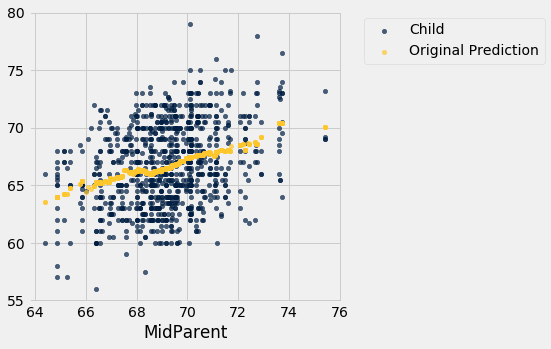

In [10]:
heights_with_predictions.scatter('MidParent')